# Chapter 5: Basic Setup

In [1]:
#!pip install PyPortfolioOpt==1.4.1

from pypfopt.efficient_frontier import EfficientFrontier

In [2]:
#!pip install yfinance --upgrade
import yfinance as yf

In [3]:
msft = yf.Ticker("MSFT")
hist = msft.history(period="max")

In [ ]:
# !pip install pandas_datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 3.8 MB/s eta 0:00:00


In [5]:
from pandas_datareader import data as pdr
data = yf.download("SPY", start="2017-01-01", end="2017-04-30")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
for col in data.columns:
    print(f"{col}->{type(data[col])}")

# 출력을 보면 컬럼 이름이 튜플 형식으로 되어있다. ('' ,'')
# 이걸 float로 바꿔줘야 한다. 

('Close', 'SPY')-><class 'pandas.core.series.Series'>
('High', 'SPY')-><class 'pandas.core.series.Series'>
('Low', 'SPY')-><class 'pandas.core.series.Series'>
('Open', 'SPY')-><class 'pandas.core.series.Series'>
('Volume', 'SPY')-><class 'pandas.core.series.Series'>


In [ ]:
# 컬럼 이름이 듀얼인덱스, 즉 튜플형태를 이제 문자열로 반환할 예정 
data.columns = ['_'.join(col) if isinstance (col, tuple) else col for col in data.columns]
data.columns
# 결과는 예를 하나 들자면 ('Open', 'SPY') 형태의 컬럼이 ['Open_SPY'] 형태로 바뀌게 된다. 

Index(['Close_SPY', 'High_SPY', 'Low_SPY', 'Open_SPY', 'Volume_SPY'], dtype='object')

In [ ]:
# 우선 모두 딕셔너리 형태로 돌아왔고, 두 컬럼이 합쳐졌으니 이걸 원래 이름으로 반환해준다. 
import pandas as pd
data.rename(columns={
    'Open_SPY': 'Open',
    'High_SPY': 'High',
    'Low_SPY': 'Low',
    'Close_SPY': 'Close',
    'Volume_SPY': 'Volume'
}, inplace=True)

print(data.columns)

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


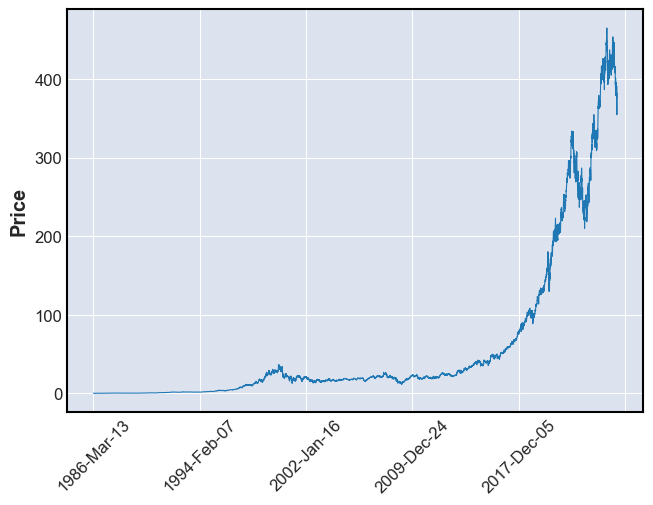

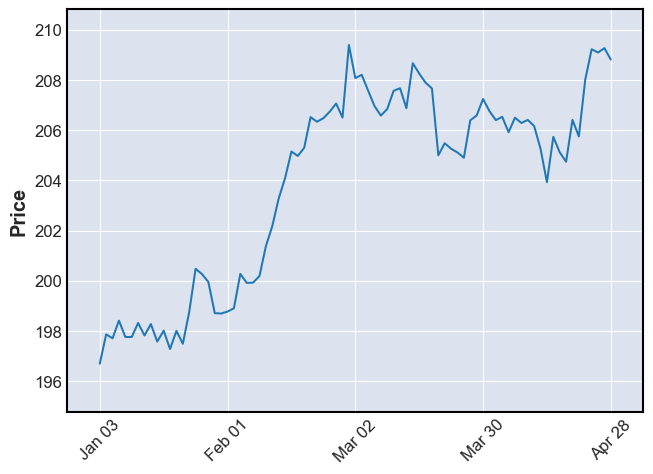

In [13]:
#!pip install mplfinance
import mplfinance as mpf

mpf.plot(hist,type='line')
mpf.plot(data,type='line')